## Declaraciones

In [211]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Joanne

##  Data Cleaning 

In [212]:
hospital_data_to_load = "data_input/hospitals.csv"
hospitals = pd.read_csv(hospital_data_to_load, encoding='latin-1')

In [213]:
hospitals_cdmx1 = hospitals.loc[(hospitals["NOMBRE DE LA ENTIDAD"] == "CIUDAD DE MEXICO")]

In [214]:
hospitals_cdmx = hospitals_cdmx1.loc[(hospitals_cdmx1["NOMBRE TIPO ESTABLECIMIENTO"] == "DE HOSPITALIZACIÓN")]

In [215]:
cdmx_hospitals = hospitals_cdmx[['CLUES', 'NOMBRE DE LA ENTIDAD', 'NOMBRE DEL MUNICIPIO', 'NOMBRE DE LA LOCALIDAD',
       'NOMBRE DE LA JURISDICCION', 'CLAVE DE LA INSTITUCION', 'NOMBRE DE TIPOLOGIA', 'CONSULTORIOS DE MED GRAL', 'CONSULTORIOS EN OTRAS AREAS',
       'TOTAL DE CONSULTORIOS', 'CAMAS EN AREA DE HOS', 'CAMAS EN OTRAS AREAS',
       'TOTAL DE CAMAS', 'NOMBRE DE LA UNIDAD', 'OBSERVACIONES DE LA DIRECCION', 'CODIGO POSTAL',
       'ESTATUS DE OPERACION', 'LONGITUD', 'LATITUD', 'NIVEL ATENCION']]
cdmx_hospitals.head()  

,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,TOTAL DE CONSULTORIOS,CAMAS EN AREA DE HOS,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,OBSERVACIONES DE LA DIRECCION,CODIGO POSTAL,ESTATUS DE OPERACION,LONGITUD,LATITUD,NIVEL ATENCION
6399,DFCRO000011,CIUDAD DE MEXICO,MIGUEL HIDALGO,MIGUEL HIDALGO,MIGUEL HIDALGO,CRO,NO ESPECIFICADO,5,0,5,60,0,60,CENTRO DE TRAUMA DE CRUZ ROJA MEXICANA EN EL D...,"AV. EJÉRCITO NACIONAL NO. 1032, COLONIA LOS MO...",11510.0,EN OPERACION,-99.2088913,19.4385309,SEGUNDO NIVEL
6505,DFIMS000020,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE ESPECIALIDADES,75,0,75,465,0,465,HES CM LA RAZA,"SERIS Y ZAACHILA COL. LA RAZA C.P. 02990, AZC...",2990.0,EN OPERACION,-99.1442,19.4662,TERCER NIVEL
6507,DFIMS000044,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE GINECO-OBSTETRICIA,31,0,31,306,0,306,HGO CM LA RAZA,CLZD. VALLEJO ESQ. ANTONIO VALERIANO COL. LA ...,2990.0,EN OPERACION,-99.1470262,19.4664404,SEGUNDO NIVEL
6508,DFIMS000056,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL INFECTOLOGÍA,6,0,6,148,0,148,HINFEC CM LA RAZA,ZAACHILA Y JACARANDAS S/N COL. LA RAZA C.P. 0...,2990.0,EN OPERACION,-99.144716,19.466279,TERCER NIVEL
6509,DFIMS000061,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL GENERAL,69,0,69,523,0,523,HG CM LA RAZA,CLZD. VALLEJO Y JACARANDAS COL. LA RAZA C.P. ...,2990.0,EN OPERACION,-99.182,19.486,SEGUNDO NIVEL


In [216]:
cdmx_hospitals = cdmx_hospitals.loc[(cdmx_hospitals["ESTATUS DE OPERACION"] == "EN OPERACION")]
cdmx_hospitals = cdmx_hospitals.loc[(cdmx_hospitals["TOTAL DE CAMAS"] != 0)]
cdmx_hospitals.to_csv('cdmx_hospitals.csv')

## Beds per capita (institutions)

In [217]:
#Import data
hospital_data_to_load = "data_output/cdmx_hospitals.csv" #data generated from "Data cleaning"
cdmx_hospitals = pd.read_csv(hospital_data_to_load, encoding='latin-1')
insurance_data_to_load = "data_input/insured_population.csv" #Data from INEGI "derechohabiencia cdmx 2015"
population_insured = pd.read_csv(insurance_data_to_load)
population_insured.set_index('CLAVE DE LA INSTITUCION', inplace=True)
bed_data_to_load = "data_input/comparison_beds.csv" #Data from www.nationmaster.com/country-info/stats/Health/Hospital-beds/Per-1%2C000-people
comparison_beds = pd.read_csv(bed_data_to_load)
comparison_beds.set_index('CLAVE DE LA INSTITUCION', inplace=True)

In [218]:
#Dataframe number of beds/institution
cdmx_hospitals = cdmx_hospitals.rename(columns={"TOTAL DE CAMAS":"camas"})
hospitals_inst = pd.DataFrame(cdmx_hospitals.groupby(["CLAVE DE LA INSTITUCION"]).camas.sum()) 

In [219]:
#Combine rare institutions in category "other"
hospitals_institutions = hospitals_inst.loc[["IMSS", "ISSSTE", "PEMEX", "SMP", "SSA"]]
others = hospitals_inst.loc[["CRO", "SEDENA", "SEMAR", "SME"]]
OTHERS = others["camas"].sum()
other_inst = pd.DataFrame({"camas": [OTHERS]})
other_inst = other_inst.rename(index={0:'OTHERS'})
hospitals_all_beds = hospitals_institutions.append(other_inst)

In [220]:
#Dataframe number of hospitals/institution
cdmx_hospitals = cdmx_hospitals.rename(columns={"NOMBRE DE LA UNIDAD":"nombre_hospital"})
hospitals_number_all = pd.DataFrame(cdmx_hospitals.groupby(["CLAVE DE LA INSTITUCION"]).nombre_hospital.count())

In [221]:
#Combine rare hospitals in category "other"
hospitals_number = hospitals_number_all.loc[["IMSS", "ISSSTE", "PEMEX", "SMP", "SSA"]]
number_others1 = hospitals_number_all.loc[["CRO", "SEDENA", "SEMAR", "SME"]]
numb_others = number_others1["nombre_hospital"].sum()
numb_others = pd.DataFrame({"nombre_hospital": [numb_others]})
numb_others = numb_others.rename(index={0:'OTHERS'})
hospitals_all_number = hospitals_number.append(numb_others)

In [222]:
#Combine dataframes 
df_institutions = hospitals_all_number.join(hospitals_all_beds, how="outer")
df_institutions = df_institutions.rename(columns={"nombre_hospital" : "number_of_hospitals"})
df_institutions = df_institutions.join(population_insured, how="outer")

In [223]:
#Add a column containing the bed per capita index
df_institutions['beds per 1000'] = (df_institutions['camas']/df_institutions['population_insured'])*1000
df_institutions

,number_of_hospitals,camas,population_insured,beds per 1000
CLAVE DE LA INSTITUCION,,,,
IMSS,29,5989,3233124,1.852388
ISSSTE,8,1848,1096209,1.685810
PEMEX,2,240,101922,2.354742
SMP,451,5420,605038,8.958115
SSA,55,7390,2009093,3.678277
OTHERS,11,1262,152621,8.268849


In [224]:
#Sort values for plots/summary table
beds= df_institutions.sort_values("beds per 1000", ascending=False)
beds.to_csv('data_output/beds_per_capita.csv') #save summary table to csv
sum_beds = beds[["camas"]]
sum_beds = sum_beds.sort_values("camas", ascending=False)

In [225]:
beds_plot = beds[['beds per 1000']]
beds_plot = beds_plot.sort_values("beds per 1000", ascending=True)

In [226]:
hospitals = df_institutions[["number_of_hospitals"]]
hospitals = hospitals.sort_values("number_of_hospitals", ascending=True)

In [227]:
#dataframe adding comparative values
beds_compared = beds_plot.append(comparison_beds)
beds_compared = beds_compared.sort_values("beds per 1000", ascending=True)
beds_compared

,beds per 1000
CLAVE DE LA INSTITUCION,
EL SALVADOR AVERAGE,1.650000
ISSSTE,1.685810
IMSS,1.852388
PEMEX,2.354742
USA AVERAGE,3.300000
SSA,3.678277
EUROPEAN UNION AVERAGE,6.420000
OTHERS,8.268849
SMP,8.958115


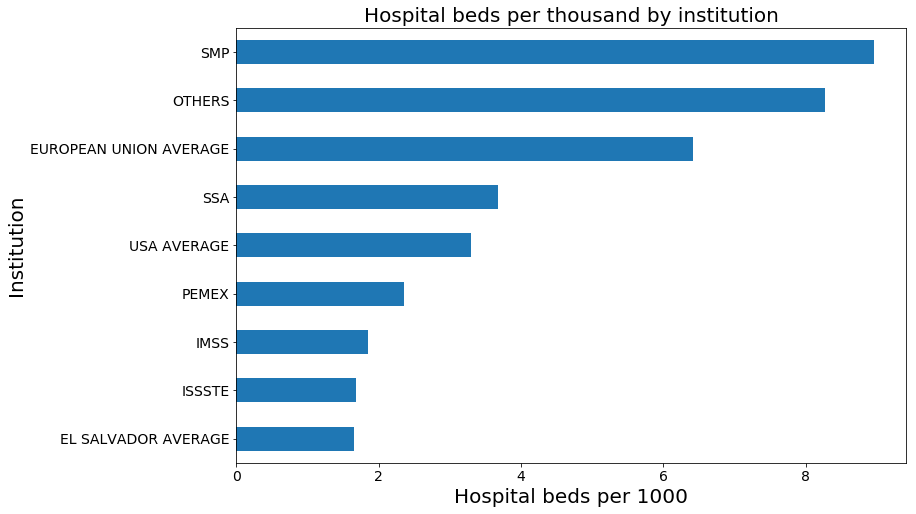

In [228]:
#Plot beds per capita with comparative values
beds_compared.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Hospital beds per thousand by institution").set_size(20)
plt.xlabel("Hospital beds per 1000").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("beds_capita_institution_compared_hor.png")
plt.show()

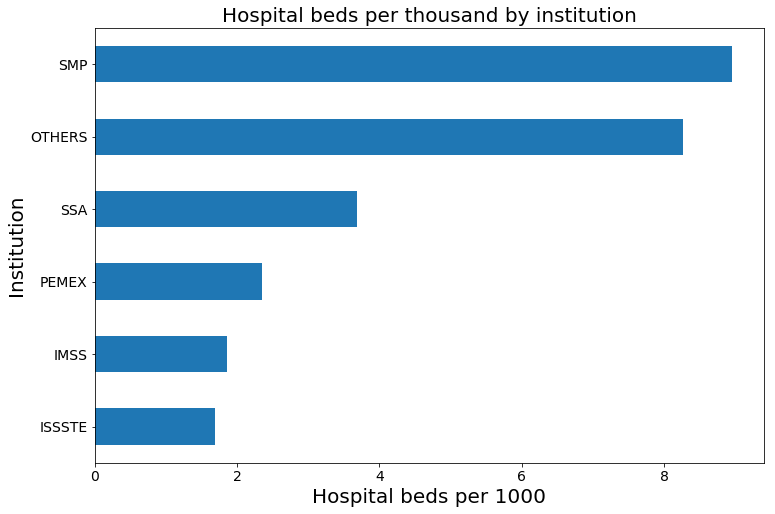

In [229]:
#Plot the number of beds per capita by institution
beds_plot.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Hospital beds per thousand by institution").set_size(20)
plt.xlabel("Hospital beds per 1000").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("beds_capita_institution_hor.png")
plt.show()

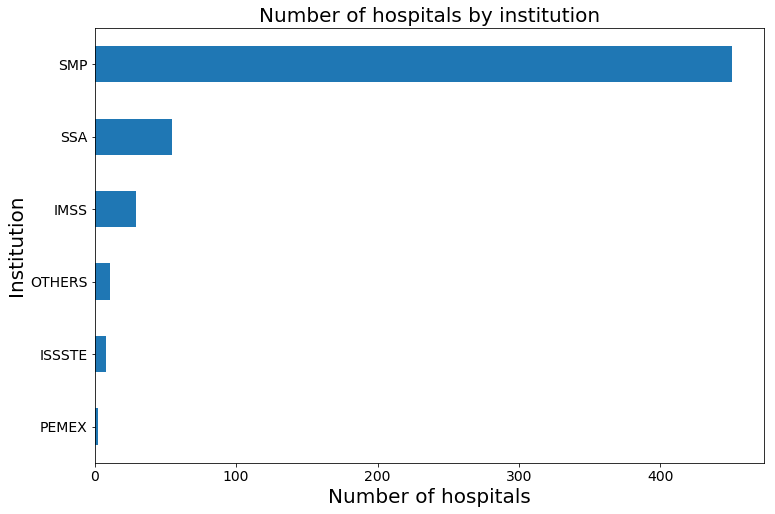

In [230]:
#Plot the number of hospitals by institution
hospitals.plot(kind="barh", figsize=(12,8), legend = False)
plt.title("Number of hospitals by institution").set_size(20)
plt.xlabel("Number of hospitals").set_size(20)
plt.ylabel("Institution").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("hospitals_institution_hor.png")
plt.show()

---

# Daniel

# Beds per capita (delegaciones)



In [231]:
hospital_data_to_load = "data_output/cdmx_hospitals.csv"

In [232]:
cdmx_hospitals_df = pd.read_csv(hospital_data_to_load)
cdmx_hospitals_df.head()

,Unnamed: 0,CLUES,NOMBRE DE LA ENTIDAD,NOMBRE DEL MUNICIPIO,NOMBRE DE LA LOCALIDAD,NOMBRE DE LA JURISDICCION,CLAVE DE LA INSTITUCION,NOMBRE DE TIPOLOGIA,CONSULTORIOS DE MED GRAL,CONSULTORIOS EN OTRAS AREAS,...,CAMAS EN AREA DE HOS,CAMAS EN OTRAS AREAS,TOTAL DE CAMAS,NOMBRE DE LA UNIDAD,OBSERVACIONES DE LA DIRECCION,CODIGO POSTAL,ESTATUS DE OPERACION,LONGITUD,LATITUD,NIVEL ATENCION
0,6399,DFCRO000011,CIUDAD DE MEXICO,MIGUEL HIDALGO,MIGUEL HIDALGO,MIGUEL HIDALGO,CRO,NO ESPECIFICADO,5,0,...,60,0,60,CENTRO DE TRAUMA DE CRUZ ROJA MEXICANA EN EL D...,"AV. EJÉRCITO NACIONAL NO. 1032, COLONIA LOS MO...",11510.0,EN OPERACION,-99.2088913,19.438531,SEGUNDO NIVEL
1,6505,DFIMS000020,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE ESPECIALIDADES,75,0,...,465,0,465,HES CM LA RAZA,"SERIS Y ZAACHILA COL. LA RAZA C.P. 02990, AZC...",2990.0,EN OPERACION,-99.1442,19.466200,TERCER NIVEL
2,6507,DFIMS000044,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL DE GINECO-OBSTETRICIA,31,0,...,306,0,306,HGO CM LA RAZA,CLZD. VALLEJO ESQ. ANTONIO VALERIANO COL. LA ...,2990.0,EN OPERACION,-99.1470262,19.466440,SEGUNDO NIVEL
3,6508,DFIMS000056,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL INFECTOLOGÍA,6,0,...,148,0,148,HINFEC CM LA RAZA,ZAACHILA Y JACARANDAS S/N COL. LA RAZA C.P. 0...,2990.0,EN OPERACION,-99.144716,19.466279,TERCER NIVEL
4,6509,DFIMS000061,CIUDAD DE MEXICO,AZCAPOTZALCO,AZCAPOTZALCO,AZCAPOTZALCO,IMSS,HOSPITAL GENERAL,69,0,...,523,0,523,HG CM LA RAZA,CLZD. VALLEJO Y JACARANDAS COL. LA RAZA C.P. ...,2990.0,EN OPERACION,-99.182,19.486000,SEGUNDO NIVEL


In [233]:
#How many beds are in CDMX
total_beds_cdmx = cdmx_hospitals_df["TOTAL DE CAMAS"].sum()

#Group info by delegation 
cdmx_by_delegation = cdmx_hospitals_df.groupby(['NOMBRE DEL MUNICIPIO'])

#How many beds are in CDMX by delegation
total_beds_by_delegation = cdmx_by_delegation["TOTAL DE CAMAS"].sum()

# Place total_beds_by_delegation dataseries into in a Pandas DataFrame
total_df_beds = pd.DataFrame(data=total_beds_by_delegation)

#How many hospitals are in CDMX by delegation
total_hospitals_by_delegation = cdmx_by_delegation["NOMBRE DE LA UNIDAD"].nunique()

# Place total_hospitals_by_delegation dataseries into a Pandas DataFrame
total_df_hospitals = pd.DataFrame(data = total_hospitals_by_delegation)
total_df_hospitals

total_df_beds['TOTAL DE HOSPITALES'] = total_df_hospitals
total_df_beds

,TOTAL DE CAMAS,TOTAL DE HOSPITALES
NOMBRE DEL MUNICIPIO,,
AZCAPOTZALCO,1910,21
BENITO JUÁREZ,1631,28
COYOACÁN,1073,26
CUAJIMALPA DE MORELOS,24,6
CUAUHTÉMOC,3735,52
GUSTAVO A. MADERO,2916,92
IZTACALCO,623,22
IZTAPALAPA,2065,117
LA MAGDALENA CONTRERAS,72,5


In [234]:
population_file = "data_input/population_cdmx.csv"

cdmx_population_df = pd.read_csv(population_file)
cdmx_population_df = cdmx_population_df.rename(columns={'Delegación': 'NOMBRE DEL MUNICIPIO', 'Total': 'TOTAL DE HABITANTES'})

cdmx_population_df.set_index('NOMBRE DEL MUNICIPIO', inplace=True) 
cdmx_population_df

total_df_beds = total_df_beds.join(cdmx_population_df, how="outer")
total_df_beds

,TOTAL DE CAMAS,TOTAL DE HOSPITALES,TOTAL DE HABITANTES
NOMBRE DEL MUNICIPIO,,,
AZCAPOTZALCO,1910,21,414711
BENITO JUÁREZ,1631,28,385439
COYOACÁN,1073,26,620416
CUAJIMALPA DE MORELOS,24,6,186391
CUAUHTÉMOC,3735,52,531831
GUSTAVO A. MADERO,2916,92,1185772
IZTACALCO,623,22,384326
IZTAPALAPA,2065,117,1815786
LA MAGDALENA CONTRERAS,72,5,239086


In [235]:
total_df_beds['BEDS PER 1000'] = total_df_beds['TOTAL DE CAMAS']/total_df_beds['TOTAL DE HABITANTES']*1000

total_df_beds['BEDS PER 1000'] = total_df_beds['BEDS PER 1000'].map("{:,.2f}".format)
total_df_beds

total_df_beds.to_csv('data_output/beds_hospitals_by_delegation.csv') 

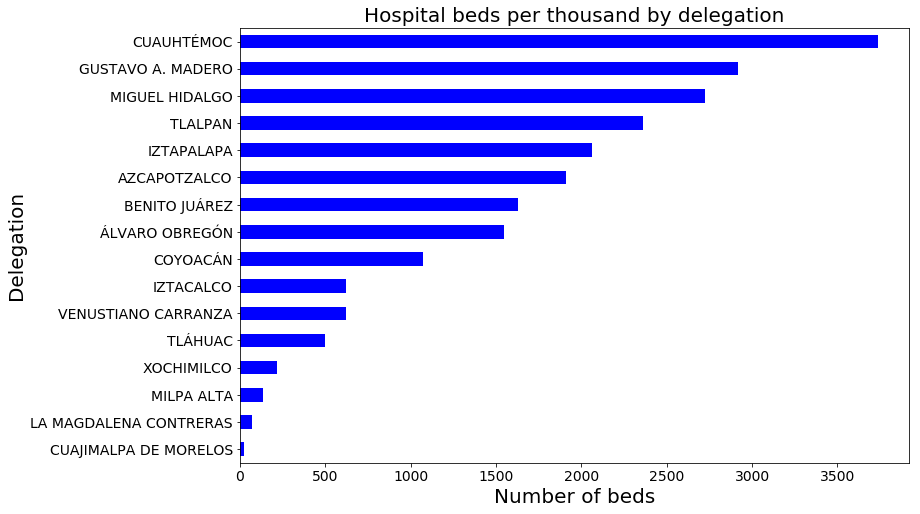

In [236]:
total_df_beds = total_df_beds.sort_values("TOTAL DE CAMAS", ascending=True)
total_df_beds['TOTAL DE CAMAS'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'blue')
plt.title("Hospital beds per thousand by delegation").set_size(20)
plt.xlabel("Number of beds").set_size(20)
plt.ylabel("Delegation").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/number_of_bed_by_delegation.png")
plt.show()


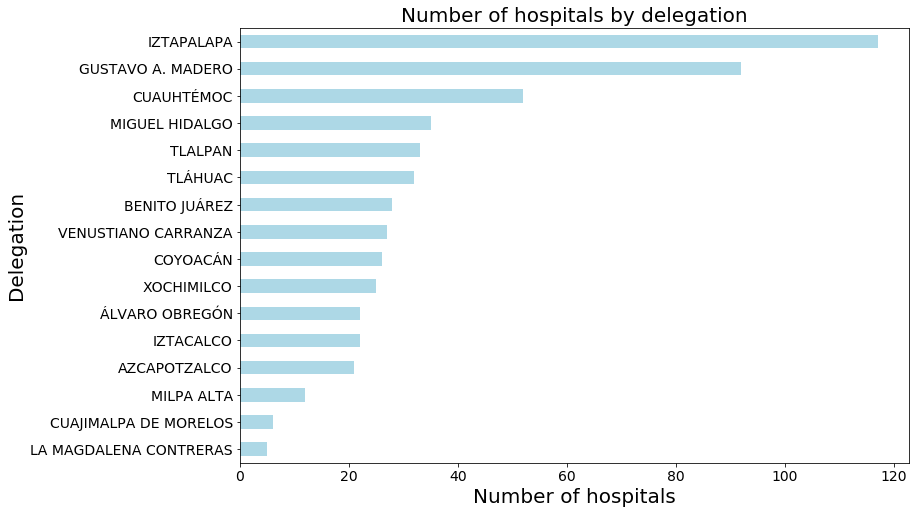

In [237]:
total_df_beds = total_df_beds.sort_values("TOTAL DE HOSPITALES", ascending=True)
total_df_beds['TOTAL DE HOSPITALES'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'lightblue')
plt.title("Number of hospitals by delegation").set_size(20)
plt.xlabel("Number of hospitals").set_size(20)
plt.ylabel("Delegation").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/number_of_hospitals_by_delegation.png")
plt.show()

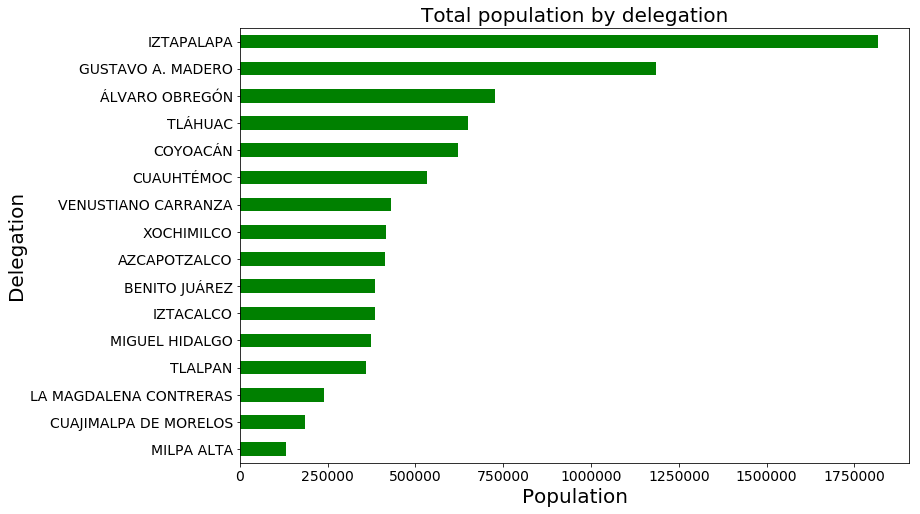

In [238]:
total_df_beds = total_df_beds.sort_values("TOTAL DE HABITANTES", ascending=True)
total_df_beds['TOTAL DE HABITANTES'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'green')
plt.title("Total population by delegation").set_size(20)
plt.xlabel("Population").set_size(20)
plt.ylabel("Delegation").set_size(20)
plt.tick_params(axis="x", labelsize=14) 
plt.tick_params(axis="y", labelsize=14)
plt.savefig("figures/Total_population_by_delegation.png")
plt.show()

In [239]:
# total_df_beds = total_df_beds.sort_values("BEDS PER 100", ascending=False)
# total_df_beds['BEDS PER 100'].plot(kind="barh", figsize=(12,8), legend = False, facecolor = 'green')
# plt.title("Total population by delegation").set_size(20)
# plt.xlabel("Population").set_size(20)
# plt.ylabel("Delegation").set_size(20)
# plt.tick_params(axis="x", labelsize=14) 
# plt.tick_params(axis="y", labelsize=14)
# plt.savefig("Total_population_by_delegation.png")
# plt.show()

---

# Joel

In [240]:
years = ['2009','2010','2011','2012','2013','2014','2015','2016']

In [241]:
urgencies = pd.DataFrame(columns=['CLUES','TIPOURGENCIA','MOTATE','YEAR','tmp_trail'])

for year in years:
    path = f'Datos/Urgencias_{year}/'
    file = f'URGENCIAS_{year}.csv'
    
    try:
        # code to process the 2009 file (it doesn't cointain headers)
        # ENTRESIDENCIA, MP y TIPOURGENCIA se empieza a reportar a partir del año 2010
        # MUNRESIDENCIA se empieza a reportar a partir del año 2012
        if year in ['2009']:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file, sep=";", header=None, 
                    names=['ID','CLUES','FOLIO','FECHAALTA',
                    'EDAD','CVEEDAD','SEXO',#'ENTRESIDENCIA','MUNRESIDENCIA',
                    'DERHAB',#'TIPOURGENCIA',
                    'MOTATE','TIPOCAMA','ENVIADOA',#'MP',
                    'AFECPRIN','IRA','PLANEDA','SOBRESEDA',
                    'FECHAINGRESO','HORASESTANCIA','MES_ESTADISTICO',
                    'HORAINIATE','MININIATE','HORATERATE','MINTERATE'],
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,#'ENTRESIDENCIA': object, 'MUNRESIDENCIA': object,
                    'DERHAB': object,#'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,#'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        # code to process the 2010 & 2011 files (it doesn't cointain headers)
        # MUNRESIDENCIA se empieza a reportar a partir del año 2012
        elif year in ['2010','2011']:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file, sep=";", header=None, 
                    names=['ID','CLUES','FOLIO','FECHAALTA',
                    'EDAD','CVEEDAD','SEXO','ENTRESIDENCIA',
                    #'MUNRESIDENCIA',
                    'DERHAB','TIPOURGENCIA',
                    'MOTATE','TIPOCAMA','ENVIADOA','MP',
                    'AFECPRIN','IRA','PLANEDA','SOBRESEDA',
                    'FECHAINGRESO','HORASESTANCIA','MES_ESTADISTICO',
                    'HORAINIATE','MININIATE','HORATERATE','MINTERATE'],
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,'ENTRESIDENCIA': object,
                    #'MUNRESIDENCIA': object,
                    'DERHAB': object,'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        # code to process the 2012, 2013 & 2014 file (it doesn't cointain headers)
        elif year in ['2012','2013','2014']:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file, sep=";", header=None, 
                    names=['ID','CLUES','FOLIO','FECHAALTA',
                    'EDAD','CVEEDAD','SEXO','ENTRESIDENCIA',
                    'MUNRESIDENCIA','DERHAB','TIPOURGENCIA',
                    'MOTATE','TIPOCAMA','ENVIADOA','MP',
                    'AFECPRIN','IRA','PLANEDA','SOBRESEDA',
                    'FECHAINGRESO','HORASESTANCIA','MES_ESTADISTICO',
                    'HORAINIATE','MININIATE','HORATERATE','MINTERATE'],
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,'ENTRESIDENCIA': object,
                    'MUNRESIDENCIA': object,'DERHAB': object,'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        # code to process the 2015 & 2016 file 
        else:
            print(f'[LOG]: Processing... {path+file}')
            urgencies_tmp = pd.read_csv(path+file,
                    dtype={'ID': object,'CLUES': object,'FOLIO': object,'FECHAALTA': object,
                    'EDAD': object,'CVEEDAD': object,'SEXO': object,'ENTRESIDENCIA': object,
                    'MUNRESIDENCIA': object,'DERHAB': object,'TIPOURGENCIA': np.float64,
                    'MOTATE': np.float64,'TIPOCAMA': object,'ENVIADOA': object,'MP': object,
                    'AFECPRIN': object,'IRA': object,'PLANEDA': object,'SOBRESEDA': object,
                    'FECHAINGRESO': object,'HORASESTANCIA': object,'MES_ESTADISTICO': object,
                    'HORAINIATE': object,'MININIATE': object,'HORATERATE': object,'MINTERATE': object})
            print(f'[LOG]: {file} processed.')
        
        if year in ['2009']:
            urgencies_tmp['TIPOURGENCIA'] = -1
        
        urgencies_tmp = urgencies_tmp[['CLUES','TIPOURGENCIA','MOTATE']]
        urgencies_tmp['YEAR'] = year
        urgencies_tmp['tmp_trail'] = 1
        
        print(f'[LOG]: Selected: {file}')
        
        urgencies = pd.concat([urgencies, urgencies_tmp], ignore_index=True)
        
        
        print(f'[LOG]: Appended: {file}')
        
        
    except:
        print(f'[LOG]: Error: {file}')
    

[LOG]: Processing... Datos/Urgencias_2009/URGENCIAS_2009.csv
[LOG]: Error: URGENCIAS_2009.csv
[LOG]: Processing... Datos/Urgencias_2010/URGENCIAS_2010.csv
[LOG]: Error: URGENCIAS_2010.csv
[LOG]: Processing... Datos/Urgencias_2011/URGENCIAS_2011.csv
[LOG]: Error: URGENCIAS_2011.csv
[LOG]: Processing... Datos/Urgencias_2012/URGENCIAS_2012.csv
[LOG]: Error: URGENCIAS_2012.csv
[LOG]: Processing... Datos/Urgencias_2013/URGENCIAS_2013.csv
[LOG]: Error: URGENCIAS_2013.csv
[LOG]: Processing... Datos/Urgencias_2014/URGENCIAS_2014.csv
[LOG]: Error: URGENCIAS_2014.csv
[LOG]: Processing... Datos/Urgencias_2015/URGENCIAS_2015.csv
[LOG]: Error: URGENCIAS_2015.csv
[LOG]: Processing... Datos/Urgencias_2016/URGENCIAS_2016.csv
[LOG]: Error: URGENCIAS_2016.csv


In [242]:
urgencies_by_year = urgencies.groupby(['YEAR'])["tmp_trail"].count().reset_index(name="count")

urgencies_by_year

,YEAR,count


In [243]:
urgencies.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,tmp_trail


In [244]:
urgencies.count()

CLUES           0
TIPOURGENCIA    0
MOTATE          0
YEAR            0
tmp_trail       0
dtype: int64

In [245]:
urgencies_cdmx = urgencies[(urgencies['CLUES'].str.contains("DF"))]

urgencies_cdmx.count()

CLUES           0
TIPOURGENCIA    0
MOTATE          0
YEAR            0
tmp_trail       0
dtype: int64

In [246]:
urgencies_cdmx_grouped = urgencies_cdmx.groupby(['CLUES','TIPOURGENCIA','MOTATE','YEAR'])["tmp_trail"].count().reset_index(name="count")

urgencies_cdmx_grouped.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,count


In [247]:
urgencies_cdmx_grouped.count()

CLUES           0
TIPOURGENCIA    0
MOTATE          0
YEAR            0
count           0
dtype: int64

In [248]:
output_file = 'data_output/urgencies_by_date.csv'

urgencies_cdmx_grouped.to_csv(output_file, encoding='utf-8', index=False)

---

In [249]:
### Upload the file  (to not process all the info twice)

#output_file = 'data_output/urgencies_by_date.csv'

#urgencies_cdmx_grouped = pd.read_csv(output_file)

In [250]:
urgencies_cdmx_grouped.head()

,CLUES,TIPOURGENCIA,MOTATE,YEAR,count


In [251]:

CatTipoUrgencia = {1:"URGENCIA CALIFICADA", 
                    2:"URGENCIA NO CALIFICADA", 
                    3:"APOYO A SERVICIOS DE MEDICINA GENERAL"}

CatMotAtencionUrg = {1:"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", 
                    2:"MEDICA", 
                    3:"GINECO-OBSTETRICA", 
                    4:"PEDIATRICA", 
                    9:"NO ESPECIFICADO"}

CatMotAtencionUrg_2008 = {1:"(AEV) ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS",
                    2:"(UC) URGENCIA CALIFICADA",
                    3:"(UNC) URGENCIA NO CALIFICADA",
                    4:"TRABAJO DE PARTO",
                    9:"NO ESPECIFICADO"}

CatMotAtencionUrg_2009 = {1:"ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS",
                    2:"URGENCIA CALIFICADA MEDICA",
                    3:"URGENCIA CALIFICADA QUIRURGICA",
                    4:"URGENCIA CALIFICADA GINECO-OBSTETRICA",
                    5:"URGENCIA CALIFICADA PEDIATRICA",
                    6:"URGENCIA NO CALIFICADA",
                    7:"APOYO A SERVICIOS DE MEDICINA GENERAL",
                    9:"NO ESPECIFICADO"}



In [252]:
urgencies_cdmx_grouped['TIPOURGENCIA_V'] = ''
urgencies_cdmx_grouped['MOTATE_V'] = ''

for key, value in CatTipoUrgencia.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['TIPOURGENCIA_V'] = np.where(urgencies_cdmx_grouped['TIPOURGENCIA']==key, 
                                                        value, urgencies_cdmx_grouped['TIPOURGENCIA_V'])
    
print('------')    

for key, value in CatMotAtencionUrg.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['MOTATE_V'] = np.where( (urgencies_cdmx_grouped['MOTATE']==key), 
                                                  value, urgencies_cdmx_grouped['MOTATE_V'])

print('------')    

for key, value in CatMotAtencionUrg_2009.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE']==key) & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  value, urgencies_cdmx_grouped['MOTATE_V'])

print('------ Fix 2009 - 1 - URGENCIA CALIFICADA')    


urgencies_cdmx_grouped['TIPOURGENCIA'] = np.where((urgencies_cdmx_grouped['MOTATE'].isin([2,3,4,5])) &
                                                    (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                    1, urgencies_cdmx_grouped['TIPOURGENCIA'])

print('------ Fix 2009 - 2 - URGENCIA NO CALIFICADA')    


urgencies_cdmx_grouped['TIPOURGENCIA'] = np.where((urgencies_cdmx_grouped['MOTATE'] == 6) &
                                                    (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                    2, urgencies_cdmx_grouped['TIPOURGENCIA'])


print('------ Fix 2009 - 3 - APOYO A SERVICIOS DE MEDICINA GENERAL')    


urgencies_cdmx_grouped['TIPOURGENCIA'] = np.where((urgencies_cdmx_grouped['MOTATE'] == 7) &
                                                    (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                    3, urgencies_cdmx_grouped['TIPOURGENCIA'])

    
print('------')  
    
for key, value in CatTipoUrgencia.items():
    print(f'{key} - {value}')
    urgencies_cdmx_grouped['TIPOURGENCIA_V'] = np.where( (urgencies_cdmx_grouped['TIPOURGENCIA']==key) &
                                                        (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                        value, urgencies_cdmx_grouped['TIPOURGENCIA_V'])

print('------ Fix 2009 MOTATE Fix') 
urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA MEDICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "MEDICA", urgencies_cdmx_grouped['MOTATE_V'])

urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA QUIRURGICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "QUIRURGICA", urgencies_cdmx_grouped['MOTATE_V'])

urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA GINECO-OBSTETRICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "GINECO-OBSTETRICA", urgencies_cdmx_grouped['MOTATE_V'])

urgencies_cdmx_grouped['MOTATE_V'] = np.where((urgencies_cdmx_grouped['MOTATE_V']=="URGENCIA CALIFICADA PEDIATRICA") & 
                                                  (urgencies_cdmx_grouped['YEAR']=='2009'), 
                                                  "PEDIATRICA", urgencies_cdmx_grouped['MOTATE_V'])
    


1 - URGENCIA CALIFICADA
2 - URGENCIA NO CALIFICADA
3 - APOYO A SERVICIOS DE MEDICINA GENERAL
------
1 - ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS
2 - MEDICA
3 - GINECO-OBSTETRICA
4 - PEDIATRICA
9 - NO ESPECIFICADO
------
1 - ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS


/Users/daniel_czz/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

---

In [ ]:
urgencies_cdmx_grouped.head()

In [ ]:
print(urgencies_cdmx_grouped.TIPOURGENCIA.unique())
print(urgencies_cdmx_grouped.TIPOURGENCIA_V.unique())

In [ ]:
print(urgencies_cdmx_grouped.MOTATE.unique())
print(urgencies_cdmx_grouped.MOTATE_V.unique())

---

In [ ]:
empty = urgencies_cdmx_grouped[(urgencies_cdmx_grouped['MOTATE_V'] == '' )]

empty.count()

In [ ]:
empty = urgencies_cdmx_grouped[(urgencies_cdmx_grouped['TIPOURGENCIA_V'] == '' )]

empty.count()

In [ ]:
output_file = 'data_output/urgencies_by_date_cat.csv'

urgencies_cdmx_grouped.to_csv(output_file, encoding='utf-8', index=False)

---

In [ ]:
### Upload the file  (to not process all the info twice)

input_file_hospitals = 'data_input/hospitals.csv'

hospital_list = pd.read_csv(input_file_hospitals, encoding='latin-1')

hospital_list = hospital_list[['CLUES','NOMBRE DE LA ENTIDAD','CLAVE DE LA ENTIDAD','CLAVE DE LA INSTITUCION','TOTAL DE CAMAS']]


In [ ]:
hospital_list.head()

In [ ]:
hospital_list.count()

In [ ]:
hospital_list_cdmx = hospital_list[(hospital_list['CLAVE DE LA ENTIDAD'] == 9 )]

hospital_list_cdmx.count()

In [ ]:
hospital_list_cdmx.head()

---

In [ ]:
#merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="left", on="CLUES")
merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="outer", on="CLUES")

In [ ]:
merged

In [ ]:
output_file = 'data_output/urgencies_by_date_vs_hospitals.csv'

merged.to_csv(output_file, encoding='utf-8', index=False)

## Figures emergencies


In [ ]:
#Files to import
er_data_to_load = "data_output/urgencies_by_date_cat.csv"
urgencies_cdmx_grouped = pd.read_csv(er_data_to_load, encoding='latin-1')
clue_data_to_load = "data_output/urgencies_by_date_vs_hospitals.csv"
clue = pd.read_csv(clue_data_to_load)
hospital_data_to_load = "data_output/cdmx_hospitals.csv"
cdmx = pd.read_csv(hospital_data_to_load)
input_file_hospitals = 'data_input/hospitals.csv'
hospital_list = pd.read_csv(input_file_hospitals, encoding='latin-1')
hospital_list.head()

In [ ]:
hospital_list = hospital_list[['CLUES', 'NOMBRE DE LA ENTIDAD', 'NOMBRE DEL MUNICIPIO', 'NOMBRE DE LA LOCALIDAD',
       'NOMBRE DE LA JURISDICCION', 'CLAVE DE LA INSTITUCION', 'NOMBRE DE TIPOLOGIA', 'CONSULTORIOS DE MED GRAL', 'CONSULTORIOS EN OTRAS AREAS',
       'TOTAL DE CONSULTORIOS', 'CAMAS EN AREA DE HOS', 'CAMAS EN OTRAS AREAS',
       'TOTAL DE CAMAS', 'NOMBRE DE LA UNIDAD', 'NIVEL ATENCION']]
hospital_list_cdmx = hospital_list[(hospital_list['NOMBRE DE LA ENTIDAD'] == "CIUDAD DE MEXICO")]

hospital_list_cdmx.count()

In [ ]:
#Total emergencies attended cdmx by year
er_year = er.groupby(["YEAR"]).sum().reset_index()
ax = er_year.plot.bar(x='YEAR', y='count', rot=0, figsize=(12,8), legend = False)
plt.xticks(tick_locations, er_year["YEAR"])
plt.title("Mexico City medical emergencies by year").set_size(20)
plt.ylabel("Number of medical emergencies").set_size(20)
plt.xlabel("Year").set_size(20)
plt.savefig("emergencies_year.png")
plt.show()

In [ ]:
#Number of medical emergencies by delegation
merged_plot = pd.DataFrame(merged.groupby(['NOMBRE DEL MUNICIPIO', 'YEAR'])['count'].sum())
table = merged_plot.pivot_table(values ="count", index ="YEAR", columns ="NOMBRE DEL MUNICIPIO")
table.plot.bar(stacked=True, figsize=(20,14))
plt.title("Number of medical emergencies by delegation").set_size(20)
plt.xlabel("Year")
plt.ylabel("Number of medical emergencies")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig("emergencies_delegation_stacked.png")
plt.show()

In [ ]:
merged_plot1 = pd.DataFrame(merged.groupby(['NOMBRE DEL MUNICIPIO'])['count'].sum())
merged_plot1 = merged_plot1.sort_values("count", ascending=True)
merged_plot1.plot.barh(figsize=(12,8), legend = False)
plt.xlabel("Number of medical emergencies")
plt.title("Number of medical emergencies by delegation").set_size(20)
plt.savefig("emergencies_delegation.png")
plt.show()

In [ ]:
#The same merge as above, but I have conserved columns to be able to analyze data by delegation
merged = pd.merge(hospital_list_cdmx, urgencies_cdmx_grouped, how="outer", on="CLUES")
merged = merged[(merged['CLAVE DE LA INSTITUCION'] == "SSA")]
merged = merged.loc[(merged["TOTAL DE CAMAS"] != 0)]
merged.count()

In [ ]:
#Make a dataframe to analyze motive of attention bey delegation
motate= pd.DataFrame(merged.groupby(["NOMBRE DEL MUNICIPIO", "MOTATE_V"])["count"].sum())
motate_tab = motate.pivot_table(values ="count", index ="MOTATE_V", columns ="NOMBRE DEL MUNICIPIO")
motate_tab = motate_tab.loc[["ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", "GINECO-OBSTETRICA", "MEDICA", "NO ESPECIFICADO", "PEDIATRICA", "QUIRURGICA", "URGENCIA NO CALIFICADA" ]]
    
motate_tab.plot.bar(stacked=True, figsize=(16,8)) 
plt.title("Mexico City medical emergencies by type").set_size(20)
plt.xlabel("Number of medical emergencies").set_size(20)
plt.ylabel("Motive for atention").set_size(20)
plt.savefig("motate_del.png")
plt.show()

In [ ]:
#Make a dataframe to analyze motive of attention (all)
motate_gen= pd.DataFrame(merged.groupby(["MOTATE_V"])["count"].sum())
motate_gen.sort_values("count", ascending=False)
motate_gen = motate_gen.loc[["ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", "GINECO-OBSTETRICA", "MEDICA", "NO ESPECIFICADO", "PEDIATRICA", "QUIRURGICA", "URGENCIA NO CALIFICADA" ]]
    
motate_gen.plot.barh(figsize=(14, 7), legend=False)  
plt.title("Mexico City medical emergencies by type").set_size(20)
plt.ylabel("Number of medical emergencies").set_size(20)
plt.xlabel("Motive for atention").set_size(20)
plt.savefig("motate.png")
plt.show()

In [ ]:
tps = motate.pivot_table(values ="count", index = "NOMBRE DEL MUNICIPIO", columns = "MOTATE_V", aggfunc='sum')
tps = tps[["ACCIDENTES, ENVENENAMIENTO Y VIOLENCIAS", "GINECO-OBSTETRICA", "MEDICA", "NO ESPECIFICADO", "PEDIATRICA", "QUIRURGICA", "URGENCIA NO CALIFICADA" ]] 
tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True, figsize=(16, 8)) 
plt.title("Mexico City medical emergencies by type and delegation").set_size(20)
plt.ylabel("Percentage of medical emergencies").set_size(20)
plt.xlabel("Delegation").set_size(20)
plt.savefig("motate_percent.png")
plt.show()